In [1]:
""" Starting  packages import (copy-paste) """
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
import matplotlib.pylab as plt
import jetset
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED

In [2]:
sed_data = ObsData(data_table=Data.from_file('sed_mrk421_mjd_56302.ecsv'))

# Data scatter plot for MRK 421 (MJD 56302) 


***  binning data  ***
---> N bins= 86
---> bin_widht= 0.2



/home/aramis/miniconda3/envs/jetset/lib/python3.7/site-packages/astropy/table/table.py:1195: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  newcol = col[slice_]


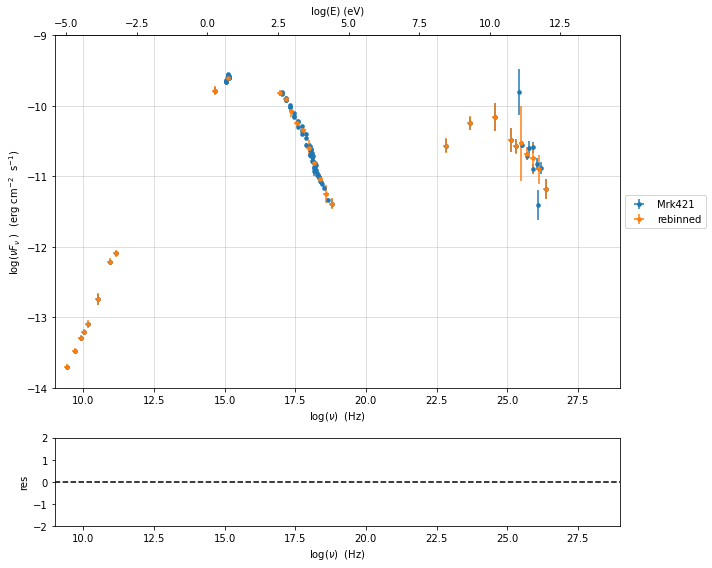

In [3]:
myPlot=sed_data.plot_sed()
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.1,[10.**6,10.**29])
myPlot.add_data_plot(sed_data,label='rebinned')
myPlot.rescale(y_min=-14,y_max=-9,x_min=9,x_max=29)

# SED shaper, getting linear slopes


*** evaluating spectral indices for data ***



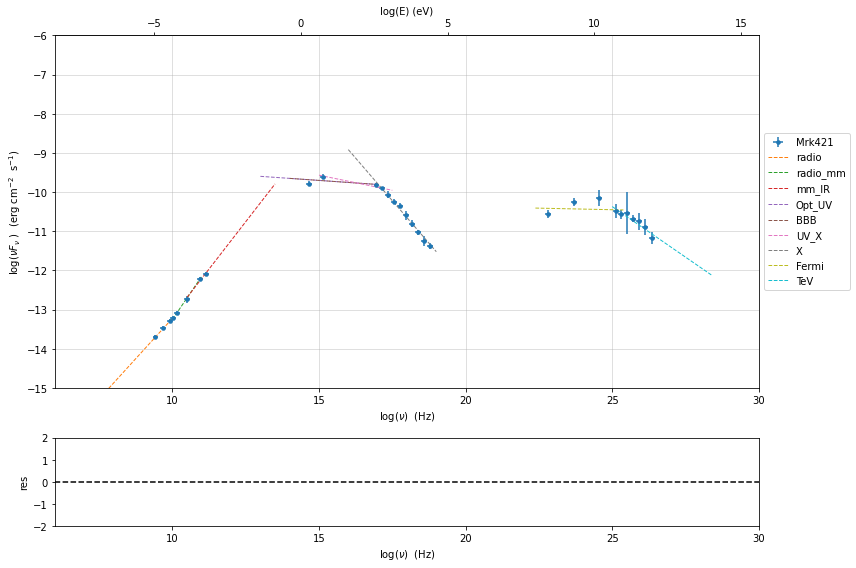

In [4]:
""" Linear trends, usded e.g. to find the s parameter that gives informations about the electron distribution """
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)

# Separate Synch/IC fit without any galaxy contribution (LSB)


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [9.5, 19.5]
---> class:  HSP



  model name  name  bestfit val     err +     err -   start val   fit range min fit range max frozen
------------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
LogParabolaEp    b -1.262339e-01 6.514836e-03    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
LogParabolaEp   Ep  1.533877e+01 8.487639e-02    --  1.567005e+01  0.000000e+00  3.000000e+01  False
LogParabolaEp   Sp -9.645063e+00 7.817386e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> sync       nu_p=+1.533877e+01 (err=+8.487639e-02)  nuFnu_p=-9.645063e+00 (err=+7.817386e-02) curv.=-1.262339e-01 (err=+6.514836e-03)


*** Log-Polynomial fitting of the IC component ***
---> fit range: [22.5, 27]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-

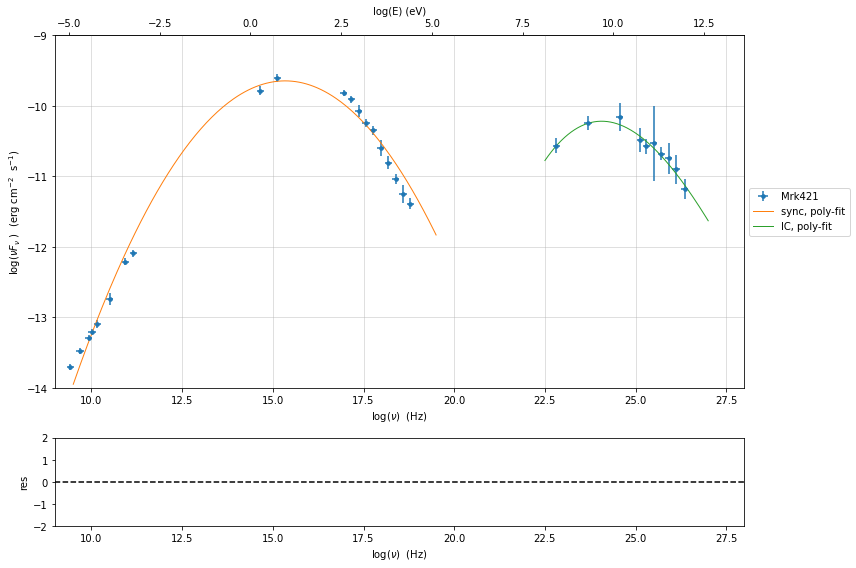

In [5]:
""" First fit without galaxy contribution"""
mm,best_fit1=my_shape.sync_fit(check_host_gal_template=False,  Ep_start=None, minimizer='lsb', silent=True, fit_range=[9.5,19.5], use_log_par=True)
my_shape.IC_fit(fit_range=[22.5,27],minimizer='lsb')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-14)
p.rescale(y_max=-9)
p.rescale(x_min=9)
p.rescale(x_max=28)

# Separate Synch/IC fit without any galaxy contribution (Minuit)


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [9.5, 19.5]
---> class:  HSP



  model name  name  bestfit val     err +     err -   start val   fit range min fit range max frozen
------------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
LogParabolaEp    b -1.262360e-01 2.496219e-03    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
LogParabolaEp   Ep  1.533874e+01 3.252065e-02    --  1.567005e+01  0.000000e+00  3.000000e+01  False
LogParabolaEp   Sp -9.645038e+00 2.995303e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> sync       nu_p=+1.533874e+01 (err=+3.252065e-02)  nuFnu_p=-9.645038e+00 (err=+2.995303e-02) curv.=-1.262360e-01 (err=+2.496219e-03)


*** Log-Polynomial fitting of the IC component ***
---> fit range: [22.5, 27]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-

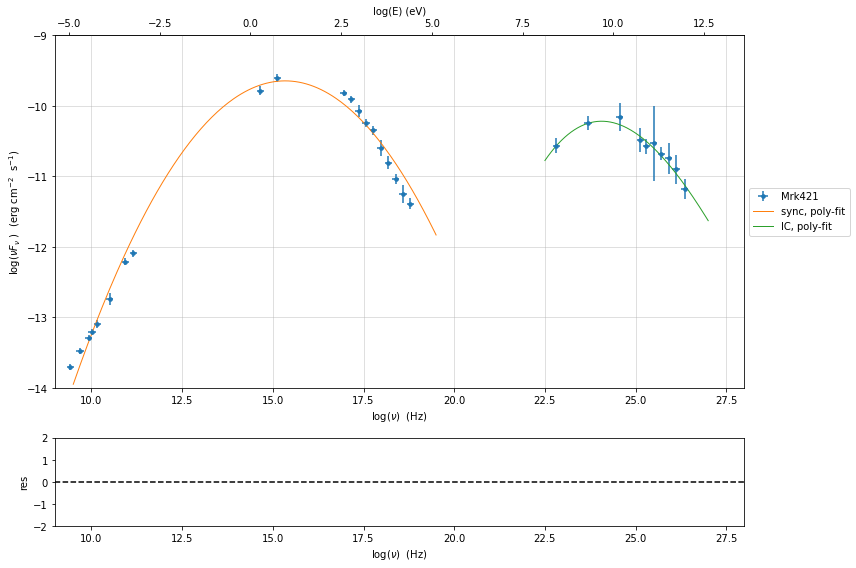

In [6]:
""" First fit without galaxy contribution"""
mm,best_fit1=my_shape.sync_fit(check_host_gal_template=False,  Ep_start=None, minimizer='minuit', silent=True, fit_range=[9.5,19.5], use_log_par=True)
my_shape.IC_fit(fit_range=[22.5,27],minimizer='minuit')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-14)
p.rescale(y_max=-9)
p.rescale(x_min=9)
p.rescale(x_max=28)

# Prefit with a log parabola electron distribution


***  constrains parameters from observable ***



/home/aramis/miniconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-linux-x86_64.egg/jetset/obs_constrain.py:481: RankWarning: Polyfit may be poorly conditioned
  B_from_nu_peaks,failed=constr_B_from_nu_peaks (jet_model,self.nu_p_S_obs,self.nu_p_IC_obs,self.rest_frame,self.B_min,self.B_max,self.beaming,params_grid_size,silent=silent)


      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.483184e+03     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.166004e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 5.514112e-01     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.667340e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 6.311802e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.194108e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 3.840962e+16     1.000000e+03     1.000000e

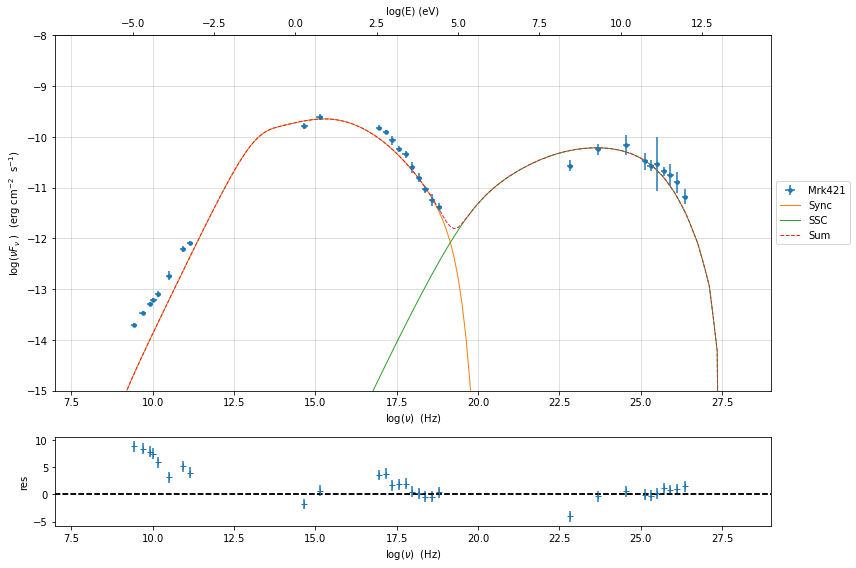

In [7]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
sed_obspar=ObsConstrain(beaming=25,
                        B_range=[0.05,0.3],
                        distr_e='lppl',
                        t_var_sec=34000,
                        nu_cut_IR=1E13,
                        SEDShape=my_shape)

prefit_jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=False, silent=True)
prefit_jet.eval()
prefit_jet.save_model('prefit_jet_gal_templ.pkl')
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)

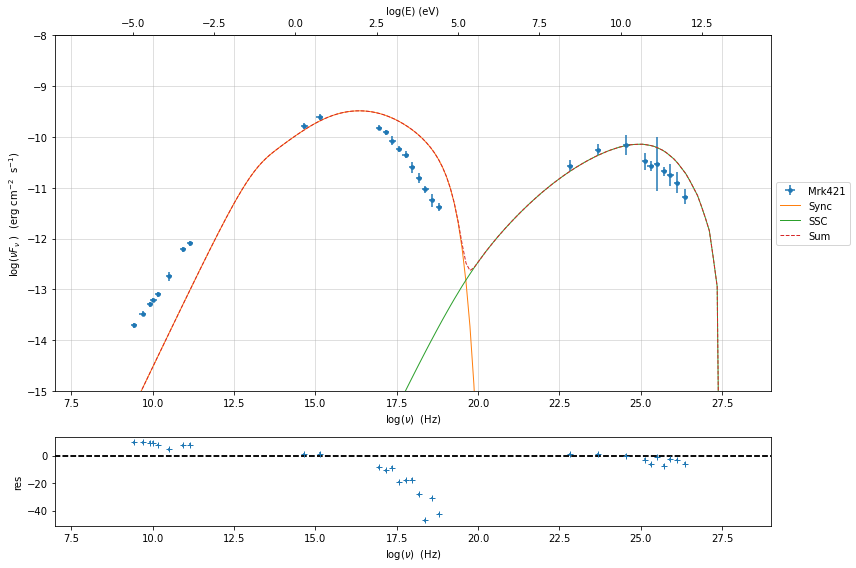

In [8]:
prefit_jet.parameters.s.val=2
prefit_jet.set_N_from_nuFnu(nuFnu_obs=10**(-9.5), nu_obs=1E16)
prefit_jet.eval()
pl=prefit_jet.plot_model(sed_data=sed_data)
pl.add_residual_plot(prefit_jet,sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)
prefit_jet.save_model('prefit_jet_gal_templ.pkl')

In [9]:
from jetset.jet_model import Jet
jet_MRK421_56302=Jet.load_model('prefit_jet_gal_templ_time_art.pkl')

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.483184e+03     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.166004e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.434082e-01     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 6.311802e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.194108e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 3.840962e+16     1.000000e+03     1.000000e

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 1.483184e+03     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.166004e+06     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 1.434082e-01     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.000000e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 6.311802e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 1.194108e+04     1.000000e+00     1.000000e+09 False  False
               R         region_size              cm 3.840962e+16     1.000000e+03     1.000000e

/home/aramis/miniconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-linux-x86_64.egg/jetset/model_manager.py:160: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


filtering data in fit range = [1.000000e+10,1.000000e+29]
data length 27

*** start fit process ***
----- 
fit run: 0
\ minim function calls=80, chisq=113.670662 UL part=-0.0000000
fit run: 1
| minim function calls=50, chisq=62.496182 UL part=-0.0000000
fit run: 2
| minim function calls=40, chisq=60.409810 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-lsb
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 1.483157e+03     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 1.657063e+06     1.000000e+00     1.000000e+15 False  False
jet_leptonic                N    em

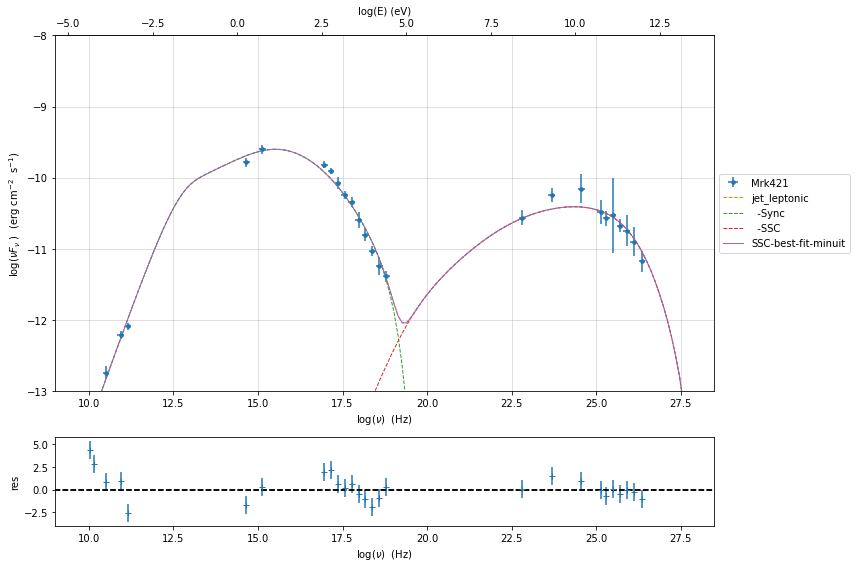

In [10]:
from jetset.minimizer import ModelMinimizer
from jetset.model_manager import  FitModel

jet_minuit=Jet.load_model('prefit_jet_gal_templ.pkl')
jet_minuit.set_gamma_grid_size(200)

fit_model_minuit=FitModel(jet=jet_minuit, name='SSC-best-fit-minuit',template=None) 
fit_model_minuit.freeze(jet_minuit,'z_cosm')
fit_model_minuit.freeze(jet_minuit,'R_H')
fit_model_minuit.jet_leptonic.parameters.beam_obj.fit_range=[5,80]
fit_model_minuit.jet_leptonic.parameters.R.fit_range=[10**15.5,10**17.5]
fit_model_minuit.jet_leptonic.parameters.gmax.fit_range=[1E5,1E7]
#fit_model_lsb.jet_leptonic.parameters.gmax.val=2.6E7
fit_model_minuit.jet_leptonic.parameters.gmin.fit_range=[10,1E4]

#fit_model_lsb.host_galaxy.parameters.nuFnu_p_host.frozen=False
#fit_model_lsb.host_galaxy.parameters.nu_scale.frozen=True
fit_model_minuit.jet_leptonic.nu_size=200
fit_model_minuit.jet_leptonic.IC_nu_size=100
fit_model_minuit.jet_leptonic._blob.adaptive_e_binning=0
model_minimizer_minuit=ModelMinimizer('lsb')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_minuit,sed_data,1E10,1E29,fitname='SSC-best-fit-lsb',repeat=3)

%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=9,x_max=28.5)

In [11]:
jet_minuit.show_pars()

 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 1.483157e+03     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 1.657063e+06     1.000000e+00     1.000000e+15 False  False
jet_leptonic                N    emitters_density         1 / cm3 9.151786e-02     0.000000e+00               -- False  False
jet_leptonic                s   LE_spectral_slope                 2.525915e+00    -1.000000e+01     1.000000e+01 False  False
jet_leptonic                r  spectral_curvature                 7.075898e-01    -1.500000e+01     1.500000e+01 False  False
jet_leptonic gamma0_log_parab    turn-over-energy lorentz-factor* 2.191768e+04     1.000000e+00     1.000000e+09 False

filtering data in fit range = [1.000000e+10,1.000000e+29]
data length 27

*** start fit process ***
----- 
fit run: 0
/ minim function calls=620, chisq=58.070388 UL part=-0.000000
fit run: 1
| minim function calls=1430, chisq=56.935428 UL part=-0.0000000.000000
fit run: 2
- minim function calls=660, chisq=56.646976 UL part=-0.000000
**************************************************************************************************
Fit report

Model: SSC-best-fit-lsb
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 1.483151e+03     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 1.657220e+06     1.000000e+00     1.000000e+15 False  False
jet_leptonic              

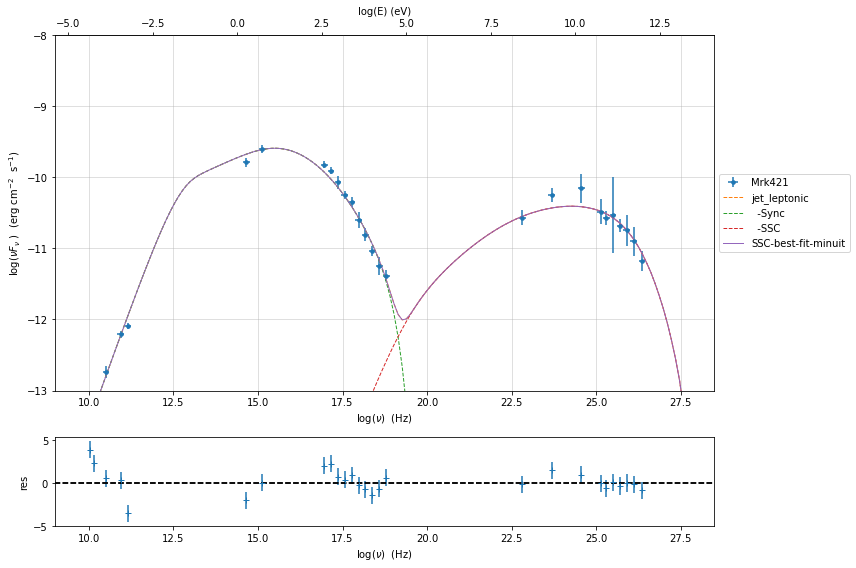

In [12]:
model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_minuit,sed_data,1E10,1E29,fitname='SSC-best-fit-lsb',repeat=3)

%matplotlib inline
fit_model_minuit.set_nu_grid(1E6,1E30,200)
fit_model_minuit.eval()
p2=fit_model_minuit.plot_model(sed_data=sed_data)
p2.rescale(y_min=-13,x_min=9,x_max=28.5)

In [13]:
p2.save("nome.pdf")

In [ ]:
p2.sedplot